# Clasificación con Bosques Aleatorios

## Importamos nuestras librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importamos nuestro Conjunto de Datos (Dataset)

In [3]:
dataset = pd.read_csv('Titanic-Dataset.csv')
X = dataset.iloc[:, [4, 5]].values
y = dataset.iloc[:, 1].values
dataset

,PasajeroId,Sobrevivio,Pasajero_clase,Nombre,Genero,Edad,Nro_hermanas_conyuges_abordo,Nro_padres_hijos_abordo,Nro_Ticket,Tarifa,Nro_Cabina,Puerto_Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
X

array([['male', 22.0],
       ['female', 38.0],
       ['female', 26.0],
       ...,
       ['female', nan],
       ['male', 26.0],
       ['male', 32.0]], dtype=object)

In [5]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ct = ColumnTransformer(transformers=[('encoder', OrdinalEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X[0]

array([1.0, 22.0], dtype=object)

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:2])
X[:, 1:2] = imputer.transform(X[:, 1:2])
X

array([[1.0, 22.0],
       [0.0, 38.0],
       [0.0, 26.0],
       ...,
       [0.0, 29.69911764705882],
       [1.0, 26.0],
       [1.0, 32.0]], dtype=object)

## Segmentamos el conjunto de datos en un conjunto de entrenamiento y otro conjunto de prueba o evaluación

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
print(X_train)

[[1.0 28.0]
 [0.0 17.0]
 [1.0 30.0]
 ...
 [1.0 29.69911764705882]
 [0.0 36.0]
 [1.0 60.0]]


In [10]:
print(y_train)

[0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0
 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 

In [11]:
print(X_test)

[[1.0 29.69911764705882]
 [1.0 29.69911764705882]
 [1.0 7.0]
 [0.0 29.69911764705882]
 [0.0 29.0]
 [1.0 29.69911764705882]
 [0.0 40.0]
 [0.0 31.0]
 [1.0 25.0]
 [0.0 29.69911764705882]
 [1.0 26.0]
 [0.0 40.0]
 [1.0 29.69911764705882]
 [0.0 7.0]
 [0.0 24.0]
 [0.0 14.0]
 [1.0 23.0]
 [1.0 19.0]
 [1.0 35.0]
 [1.0 0.42]
 [1.0 18.0]
 [0.0 22.0]
 [1.0 29.69911764705882]
 [1.0 29.69911764705882]
 [0.0 22.0]
 [0.0 40.0]
 [1.0 32.0]
 [0.0 22.0]
 [0.0 25.0]
 [0.0 2.0]
 [1.0 33.0]
 [0.0 50.0]
 [1.0 28.0]
 [1.0 29.69911764705882]
 [1.0 29.0]
 [1.0 32.0]
 [1.0 43.0]
 [1.0 28.0]
 [1.0 25.0]
 [1.0 54.0]
 [1.0 60.0]
 [1.0 25.0]
 [1.0 29.69911764705882]
 [1.0 14.0]
 [0.0 35.0]
 [1.0 29.69911764705882]
 [1.0 29.69911764705882]
 [0.0 18.0]
 [1.0 39.0]
 [1.0 52.0]
 [1.0 29.69911764705882]
 [1.0 23.0]
 [0.0 4.0]
 [1.0 19.0]
 [1.0 29.69911764705882]
 [1.0 24.0]
 [1.0 62.0]
 [0.0 11.0]
 [1.0 10.0]
 [1.0 29.69911764705882]
 [1.0 22.0]
 [0.0 29.0]
 [0.0 54.0]
 [1.0 29.69911764705882]
 [0.0 27.0]
 [1.0 32.0]
 [0.

In [12]:
print(y_test)

[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1
 1]


## Escalado de variables

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
print(X_train)

[[ 0.72705166 -0.14358693]
 [-1.37541808 -0.99275516]
 [ 0.72705166  0.01080729]
 ...
 [ 0.72705166 -0.01241996]
 [-1.37541808  0.47398996]
 [ 0.72705166  2.32672063]]


In [15]:
print(X_test)

[[ 0.72705166 -0.01241996]
 [ 0.72705166 -0.01241996]
 [ 0.72705166 -1.76472627]
 [-1.37541808 -0.01241996]
 [-1.37541808 -0.06638982]
 [ 0.72705166 -0.01241996]
 [-1.37541808  0.7827784 ]
 [-1.37541808  0.0880044 ]
 [ 0.72705166 -0.37517827]
 [-1.37541808 -0.01241996]
 [ 0.72705166 -0.29798116]
 [-1.37541808  0.7827784 ]
 [ 0.72705166 -0.01241996]
 [-1.37541808 -1.76472627]
 [-1.37541808 -0.45237538]
 [-1.37541808 -1.22434649]
 [ 0.72705166 -0.52957249]
 [ 0.72705166 -0.83836094]
 [ 0.72705166  0.39679285]
 [ 0.72705166 -2.27268327]
 [ 0.72705166 -0.91555805]
 [-1.37541808 -0.6067696 ]
 [ 0.72705166 -0.01241996]
 [ 0.72705166 -0.01241996]
 [-1.37541808 -0.6067696 ]
 [-1.37541808  0.7827784 ]
 [ 0.72705166  0.16520151]
 [-1.37541808 -0.6067696 ]
 [-1.37541808 -0.37517827]
 [-1.37541808 -2.15071183]
 [ 0.72705166  0.24239862]
 [-1.37541808  1.55474952]
 [ 0.72705166 -0.14358693]
 [ 0.72705166 -0.01241996]
 [ 0.72705166 -0.06638982]
 [ 0.72705166  0.16520151]
 [ 0.72705166  1.01436974]
 

## Entrenamiento del modelo Random Forest Classification con el conjunto de entrenamiento

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [18]:
X[1]

array([0.0, 38.0], dtype=object)

## Predicción de un nuevo resultado

In [19]:
print(classifier.predict(sc.transform([[0.0, 38.0]])))

[1]


## Predicción de los resultados del clasificador

In [20]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

## Generando una matríz de confusión

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[110  29]
 [ 23  61]]


0.7668161434977578

## Visualizando de los resultados del conjunto de entrenamiento

C:\Users\rimberth.villca\AppData\Local\Temp\ipykernel_15248\2726263131.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


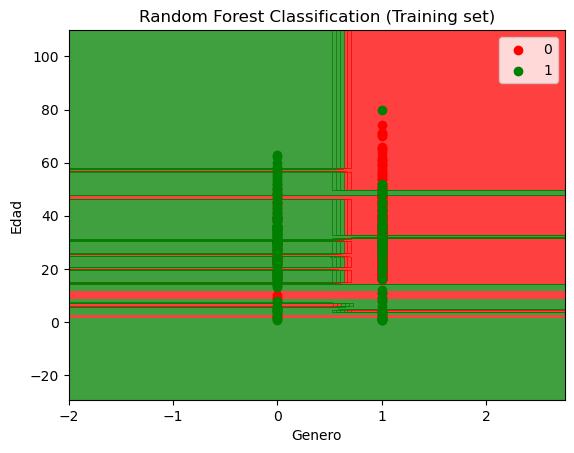

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 2, stop = X_set[:, 0].max() + 2, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 30, stop = X_set[:, 1].max() + 30, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Genero')
plt.ylabel('Edad')
plt.legend()
plt.show()

## Visualizando de los resultados del conjunto de pruebas

C:\Users\rimberth.villca\AppData\Local\Temp\ipykernel_15248\3338906395.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


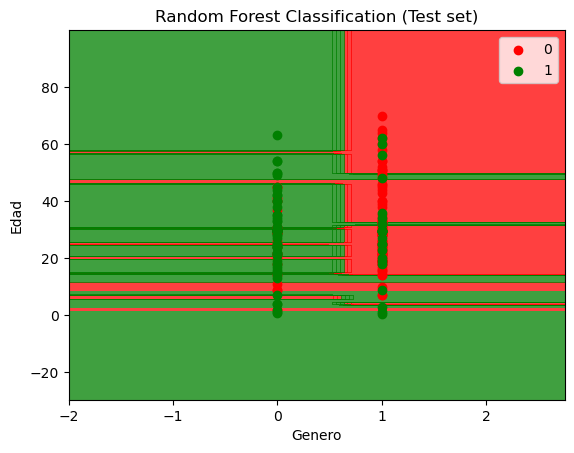

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 2, stop = X_set[:, 0].max() + 2, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 30, stop = X_set[:, 1].max() + 30, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Genero')
plt.ylabel('Edad')
plt.legend()
plt.show()